# Census Income Project

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data set
df=pd.read_csv('census_income.csv')

## Exploratory Data Analysis

In [3]:
# finding out the number of rows and columns in the data set.
df.shape

(32560, 15)

In [4]:
#Glimpse of the data set with initial 5 rows.
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Getting the information about the variables in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The above analysis shows that there are 6 variables with integer type and 9 variables with object type data ie. in strings format.

In [6]:
# finding out the null values in the data set
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. There is a huge difference between the 75% and max value show that there is a possibility of outliers.
2. education is categorised in different levels
3. All the values min, 25%, 50% & 75% are 0 and the maximum value is very far from the mean , shows that there are outliers.
4. In Hours per week there is a hugedifference between max value and 75% , shows the probability of ouliers in the data set.

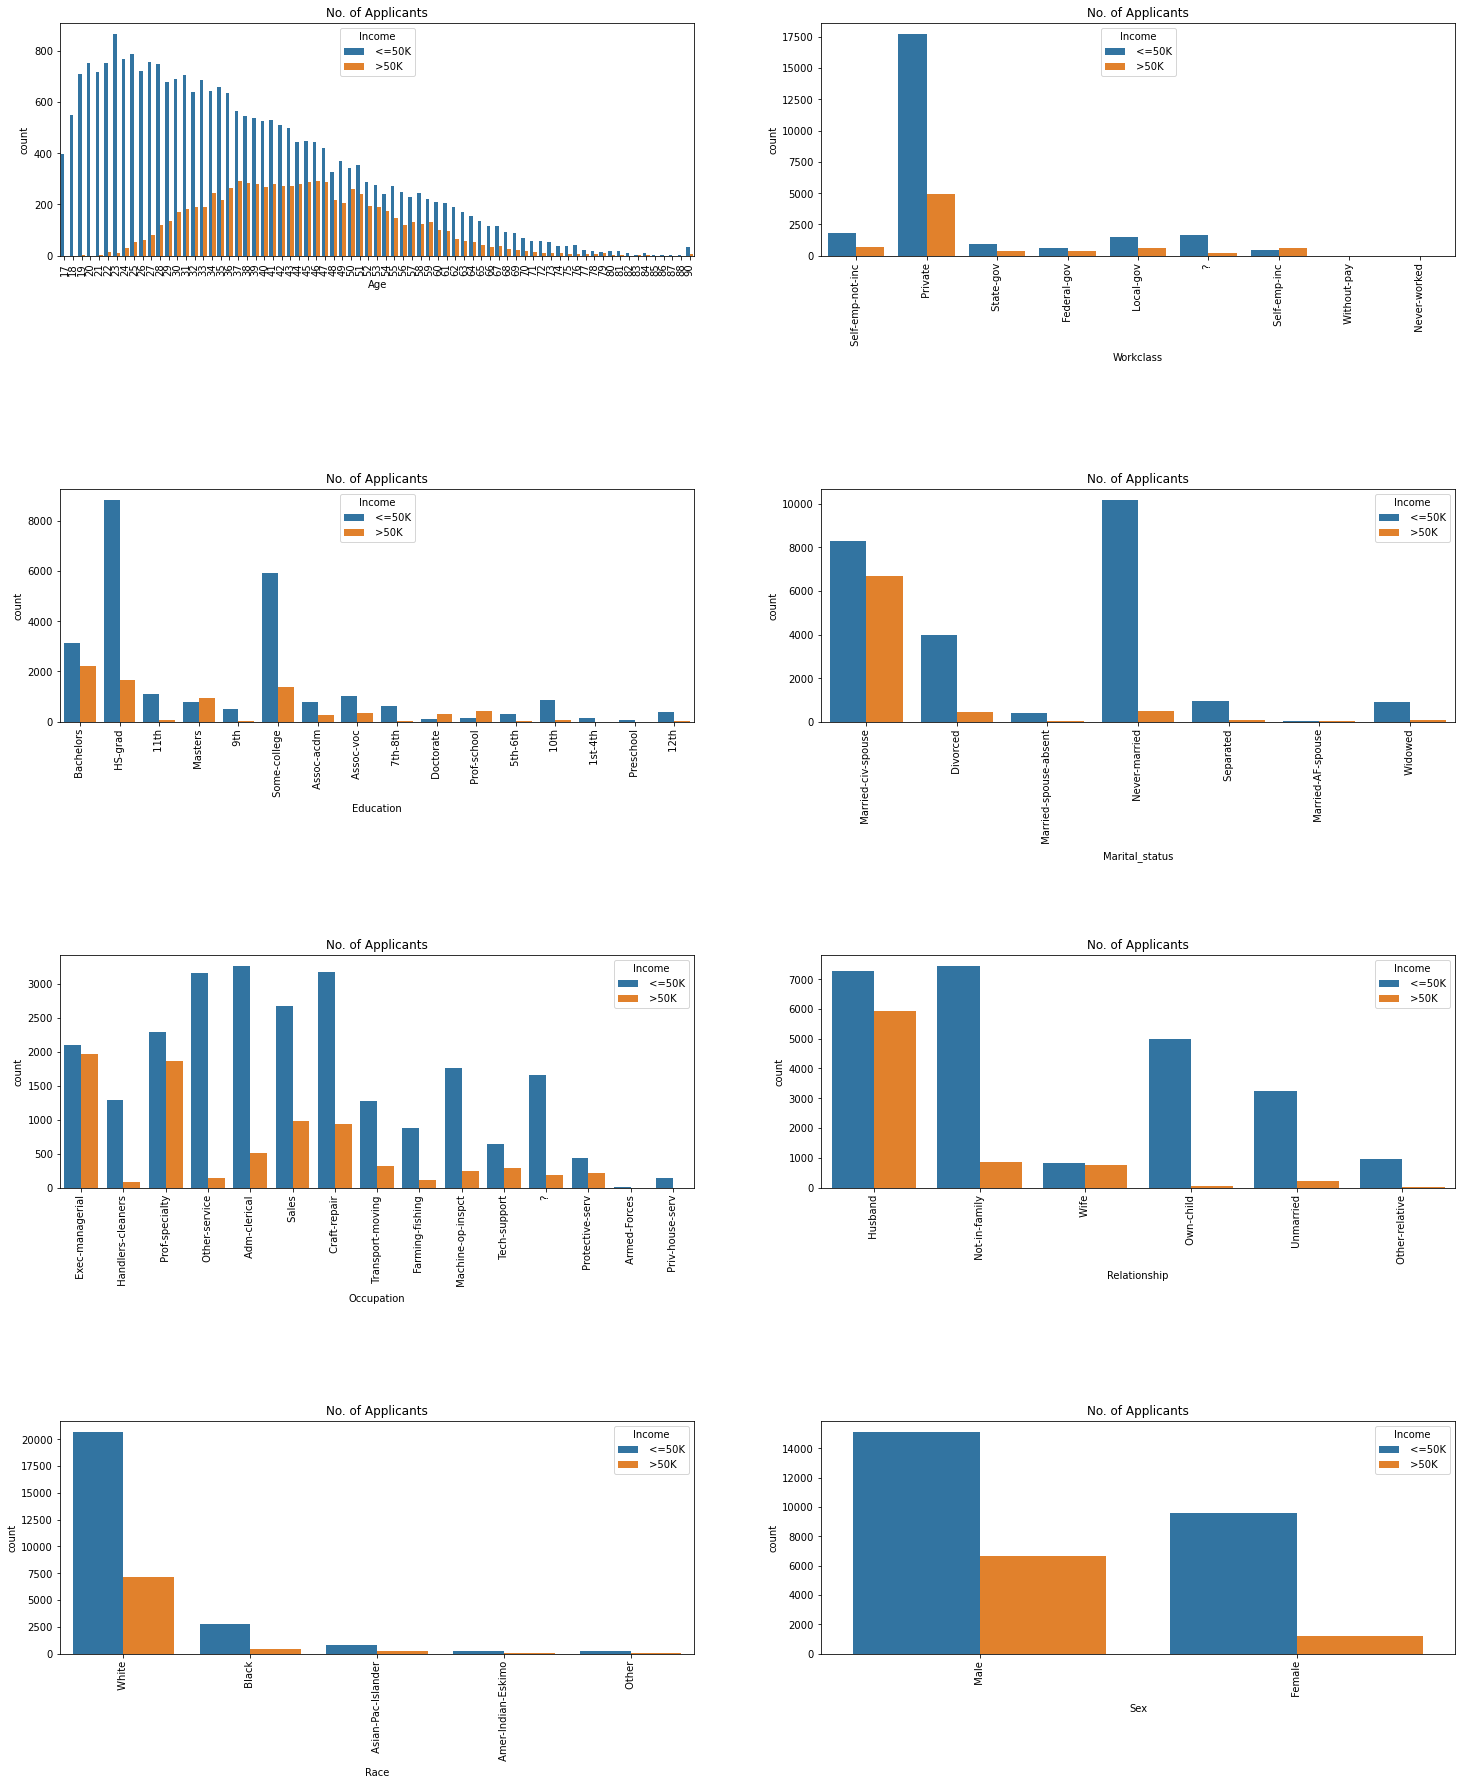

In [8]:
# Finding out the value count of the categories present in different variables in accordance with the income status.
variables=['Age','Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']
fig=plt.subplots(figsize=(25,30))
for i, j in enumerate(variables):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df,hue='Income')
    plt.xticks(rotation=90)
    plt.title("No. of Applicants")

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Education_num      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Capital_gain       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Capital_loss         AxesSubplot(0.125,0.518913;0.168478x0.16413)
Hours_per_week    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

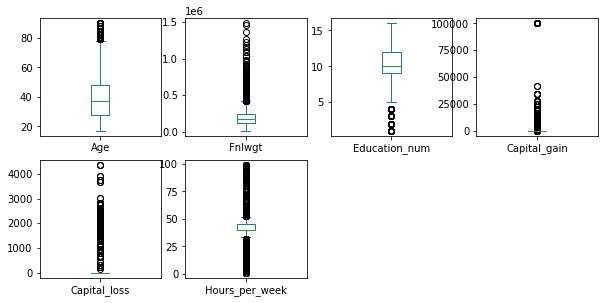

In [9]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

In [10]:
# droping two columns as they have are repetitive with other columns.
df=df.drop(['Fnlwgt','Education_num'],axis=1)

In [11]:
# Using the label encoder --Changing the string values to numerical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [12]:
df.corr()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Education,-0.010508,0.023537,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Marital_status,-0.266292,-0.064798,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.030047,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333
Capital_loss,0.057775,0.012231,0.016744,-0.034182,0.017979,-0.061064,0.018902,0.045572,-0.031614,1.000000,0.054256,0.000420,0.150523


#### Treating the Outliers

In [13]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([11, 10,  6, ...,  6,  6,  6], dtype=int64))


In [14]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape',dfnew.shape)

dfnew.shape (27869, 13)


Total number of (32560-27869)4691 rows are removed.

In [15]:
df=dfnew

<AxesSubplot:>

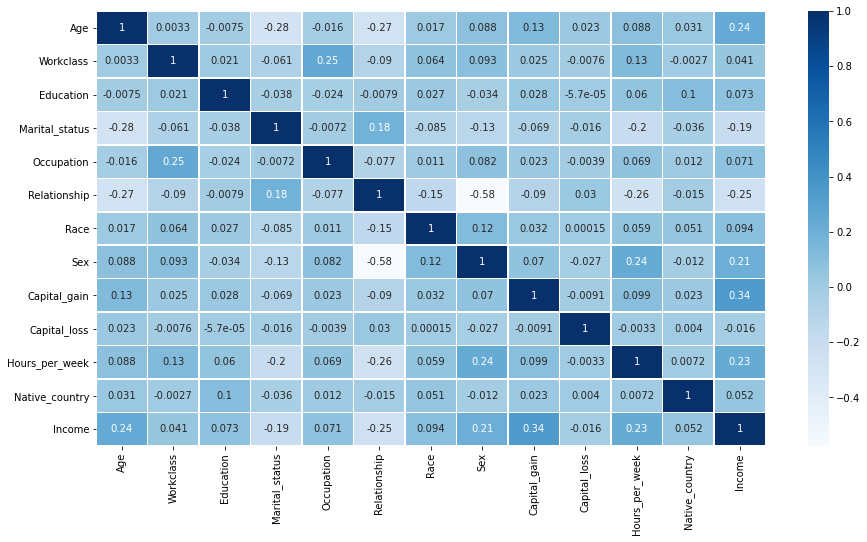

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=0.5)

The above heatmap shows the correlation between the different variables.

In [17]:
df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,9,2,4,0,4,1,0,0,13,39,0
1,38,4,11,0,6,1,4,1,0,0,40,39,0
2,53,4,1,2,6,0,2,1,0,0,40,39,0
4,37,4,12,2,4,5,4,0,0,0,40,39,0
5,49,4,6,3,8,1,2,0,0,0,16,23,0


In [18]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [19]:
x.shape

(27869, 12)

In [20]:
y.shape

(27869, 1)

#### Normalising the values

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale=StandardScaler()
x=scale.fit_transform(x)

#### Splitting the data set into training and test data set.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)

In [25]:
xtrain.shape

(19508, 12)

In [26]:
ytrain.shape

(19508, 1)

In [27]:
xtest.shape

(8361, 12)

In [28]:
ytest.shape

(8361, 1)

#### Developing the model

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
svc=SVC(kernel='rbf')        #kernel='rbf'--------->by default
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.834589163975601
[[6351  165]
 [1218  627]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6516
           1       0.79      0.34      0.48      1845

    accuracy                           0.83      8361
   macro avg       0.82      0.66      0.69      8361
weighted avg       0.83      0.83      0.81      8361



In [110]:
#DecisionTreeClassifier(criterion=gini)---------->by default
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.8132998445162062
[[5755  761]
 [ 800 1045]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6516
           1       0.58      0.57      0.57      1845

    accuracy                           0.81      8361
   macro avg       0.73      0.72      0.73      8361
weighted avg       0.81      0.81      0.81      8361



In [111]:
#DecisionTreeClassifier(criterion='entropy')
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.814376270781007
[[5750  766]
 [ 786 1059]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6516
           1       0.58      0.57      0.58      1845

    accuracy                           0.81      8361
   macro avg       0.73      0.73      0.73      8361
weighted avg       0.81      0.81      0.81      8361



In [112]:
# k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.8354263844037795
[[5945  571]
 [ 805 1040]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6516
           1       0.65      0.56      0.60      1845

    accuracy                           0.84      8361
   macro avg       0.76      0.74      0.75      8361
weighted avg       0.83      0.84      0.83      8361



In [113]:
# k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.8300442530797751
[[5870  646]
 [ 775 1070]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6516
           1       0.62      0.58      0.60      1845

    accuracy                           0.83      8361
   macro avg       0.75      0.74      0.75      8361
weighted avg       0.83      0.83      0.83      8361



In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
pred=lg.predict(xtest)
print("accuracy_score :",accuracy_score(pred,ytest))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

accuracy_score : 0.8106685803133596
[[6272  244]
 [1339  506]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      6516
           1       0.67      0.27      0.39      1845

    accuracy                           0.81      8361
   macro avg       0.75      0.62      0.64      8361
weighted avg       0.79      0.81      0.78      8361



In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtrain,ytrain)
predrfc=rfc.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))
print(classification_report(ytest,predrfc))

0.8472670733165889
[[6006  510]
 [ 767 1078]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6516
           1       0.68      0.58      0.63      1845

    accuracy                           0.85      8361
   macro avg       0.78      0.75      0.77      8361
weighted avg       0.84      0.85      0.84      8361



In [118]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
abc.score(xtrain,ytrain)
predabc=abc.predict(xtest)
print(accuracy_score(ytest,predabc))
print(confusion_matrix(ytest,predabc))
print(classification_report(ytest,predabc))

0.8624566439421122
[[6115  401]
 [ 749 1096]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6516
           1       0.73      0.59      0.66      1845

    accuracy                           0.86      8361
   macro avg       0.81      0.77      0.78      8361
weighted avg       0.86      0.86      0.86      8361



In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
score=cross_val_score(abc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85486186 0.85719412 0.86024399 0.86742017 0.86452539]
0.8608491038891379
0.0046101222311028655


In [122]:
from sklearn.model_selection import KFold

In [123]:
KFold=KFold(5)
score=cross_val_score(abc,x,y,cv=KFold)
print(score)
print(score.mean())
print(score.std())

[0.85540007 0.85827054 0.85880875 0.86616433 0.86380764]
0.8604902693808395
0.00392083617273871


In [124]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [125]:
y_pred_prob=abc.predict_proba(xtest)[:,1]

In [126]:
y_pred_prob

array([0.49829344, 0.49401576, 0.5276269 , ..., 0.48798086, 0.45389091,
       0.49515372])

In [127]:
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)

In [128]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99953959, 0.99984653,
       1.        ])

In [129]:
tpr

array([0.0000000e+00, 5.4200542e-04, 2.7100271e-03, ..., 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00])

In [130]:
thresholds

array([1.53953198, 0.53953198, 0.53838614, ..., 0.45224832, 0.45119258,
       0.45070675])

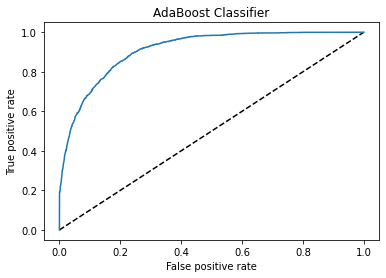

In [131]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [132]:
auc_score=roc_auc_score(ytest,abc.predict(xtest))

In [133]:
print(auc_score)

0.7662485588944287


#### Saving the Best model----the scores of AdaBoost Classifier are the best hence saving it for further use.

In [134]:
#from sklearn.externals import joblib
import joblib

In [135]:
# Save the model as a object file

joblib.dump(abc,'abcfile.obj')
#Load the model from the file

abc_from_joblib=joblib.load('abcfile.obj')

#Use the loaded model to make predictions

abc_from_joblib.predict(xtest)

array([0, 0, 1, ..., 0, 0, 0])